In [1]:
# Allows imports from other packages in the project
import sys
import os
notebook_dir = os.getcwd()
project_root = os.path.abspath(os.path.join(notebook_dir, ".."))
sys.path.append(project_root)

In [2]:
import numpy as np
import pandas as pd

import yfinance as yf

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [3]:
snp_info_path = "../data/snp_info.csv"
info = (
    pd.read_csv(snp_info_path, index_col=0)
    .set_index("Symbol")
)

In [4]:
stocks_by_cluster_df = pd.read_csv("../data/stocks_by_cluster.csv")
stocks_by_cluster_df

,cluster_1,cluster_2,cluster_3,cluster_4,cluster_5,cluster_6,cluster_7,cluster_8
0,TGT,PFE,DVN,BAC,MSFT,SLB,AMAT,GOOG
1,TJX,ABBV,MRO,JPM,ABT,CVX,MU,GOOGL
2,WBA,JNJ,XOM,MS,MGM,HAL,NVDA,AMZN
3,WMT,GILD,MPC,C,ORCL,COP,AAPL,BSX
4,CVS,BMY,WMB,RF,EBAY,KMI,NFLX,MDLZ


In [5]:
ticker_to_idx = {
    ticker: (r, c)
    for r, row in enumerate(stocks_by_cluster_df.values)
    for c, ticker in enumerate(row)
}

## Get Samples and Labels


In [6]:
samples = pd.read_csv(
    "../data/samples_cluster.csv",
    index_col=0,
    header=[0, 1, 2],
    parse_dates=True
)
samples.head()

Cluster     cluster_1                                                       \
Asset         asset_1                                                        
Metrics         Close        RSI  k_percent  r_percent      MACD MACD_EMA9   
Date                                                                         
2016-01-22  69.720001  40.841917  34.171927 -65.828073 -0.609793 -0.426234   
2016-01-25  68.919998  36.140205  25.786151 -74.213849 -0.624351 -0.467303   
2016-01-26  70.440002  49.009156  41.719109 -58.280891 -0.535363 -0.481309   
2016-01-27  70.690002  50.887399  44.339654 -55.660346 -0.445382 -0.473958   
2016-01-28  70.989998  53.270660  54.381726 -45.618274 -0.352089 -0.449137   

Cluster                                                                  ...  \
Asset                                                asset_2             ...   
Metrics    Price Rate Of Change On Balance Volume      Close        RSI  ...   
Date                                                                     ...   
2016-01-22            -0.023256         -28661600  34.474998  52.461434  ...   
2016-01-25            -0.048329         -33973800  34.380001  50.599646  ...   
2016-01-26            -0.039804         -29921200  34.845001  58.848049  ...   
2016-01-27            -0.013261         -25959800  34.595001  53.324693  ...   
2016-01-28             0.008237         -21886500  34.695000  55.262643  ...   

Cluster               cluster_8                                          \
Asset                   asset_4                      asset_5              
Metrics    Price Rate Of Change On Balance Volume      Close        RSI   
Date                                                                      
2016-01-22             0.024096         -48541400  41.599998  49.475466   
2016-01-25             0.023351         -57890800  40.200001  38.612846   
2016-01-26            -0.023047         -68694300  41.349998  49.186828   
2016-01-27            -0.018803         -78069200  41.119999  47.306391   
2016-01-28            -0.069383         -86157700  41.549999  51.320984   

Cluster                                                                    \
Asset                                                                       
Metrics     k_percent  r_percent      MACD MACD_EMA9 Price Rate Of Change   
Date                                                                        
2016-01-22  40.251530 -59.748470 -0.223801 -0.216184             0.014882   
2016-01-25  10.901476 -89.098524 -0.263040 -0.225897            -0.035509   
2016-01-26  37.193741 -62.806259 -0.219761 -0.224634            -0.018281   
2016-01-27  42.857094 -57.142906 -0.198261 -0.219238             0.013057   
2016-01-28  65.614033 -34.385967 -0.152250 -0.205594             0.004594   

Cluster                       
Asset                         
Metrics    On Balance Volume  
Date                          
2016-01-22         -36938000  
2016-01-25         -50403200  
2016-01-26         -42275700  
2016-01-27         -50018100  
2016-01-28         -38397600  

[5 rows x 320 columns]

In [7]:
labels = pd.read_csv(
    "../data/labels_cluster.csv",
    index_col="Date",
    parse_dates=True,
)
labels.head()


,TGT,TJX,WBA,WMT,CVS,PFE,ABBV,JNJ,GILD,BMY,...,AMAT,MU,NVDA,AAPL,NFLX,GOOG,GOOGL,AMZN,BSX,MDLZ
Date,,,,,,,,,,,,,,,,,,,,,
2016-01-22,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-01-25,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-01-26,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-01-27,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-01-28,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


## Tensor Ensemble Learning

In [8]:
# from grtel.decomposition import GLTD
GLTD = lambda x: print("TODO: Implement GLTD")
from grtel.utils import print_scores, print_1_percentage, confusion_matrix_metrics
from grtel.classification import GRTEL

from hottbox.core import Tensor, TensorTKD
from hottbox.pdtools import pd_to_tensor
from hottbox.algorithms.decomposition import HOOI

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [9]:
X: list[Tensor] = []
for i in range(len(samples)):
    # Set `Cluster` as the third mode of the tensor
    X_t = samples.iloc[i].reorder_levels(['Metrics', 'Asset', 'Cluster'])
    X.append(pd_to_tensor(X_t))

y = np.array(labels)

# Example of the first sample and label
print(X[0], '\n\n', y[0])

This tensor is of order 3 and consists of 320 elements.
Sizes and names of its modes are (8, 5, 8) and ['Metrics', 'Asset', 'Cluster'] respectively. 

 [1. 1. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1.
 0. 1. 1. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


In [10]:
# Represent each sample in Tucker form and store in a list
use_hooi = True
algo = HOOI() if use_hooi else GLTD()
rank = (4, 4, 4)
X_tk: list[TensorTKD] = [algo.decompose(sample, rank=rank) for sample in X]

test_size = 0.25
is_random_split = False

if is_random_split:
    X_train, X_test, y_train, y_test = train_test_split(X_tk, y, test_size=test_size, random_state=42)
else:
    k = int(len(X_tk) * (1. - test_size))
    X_train, X_test = X_tk[:k], X_tk[k:]
    y_train, y_test = y[:k], y[k:]

/Users/atayardimci/Desktop/Trading/trading/.venv/lib/python3.10/site-packages/hottbox/algorithms/decomposition/base.py:85: RuntimeWarning: invalid value encountered in sqrt
  S = np.sqrt(S)


In [11]:
# Initialise the classifier

# number of base classifiers required per class
R = np.sum(rank)
n_classes = 1 if y.ndim == 1 else y.shape[1]

base_classifiers = [
    [DecisionTreeClassifier() for _ in range(R)]
    for _ in range(n_classes)
]

grtel = GRTEL(
    base_classifiers=base_classifiers,
    n_classes=n_classes,
    probability=True,
)
grtel.fit(X_train, y_train)

0 - 1 - 2 - 3 - 4 - 5 - 6 - 7 - 8 - 9 - 10 - 11 - 12 - 13 - 14 - 15 - 16 - 17 - 18 - 19 - 20 - 21 - 22 - 23 - 24 - 25 - 26 - 27 - 28 - 29 - 30 - 31 - 32 - 33 - 34 - 35 - 36 - 37 - 38 - 39 - 


## Performance

In [12]:
# IMPORTANT NOTE:
# Line `y_pred = df.idxmax(axis=1).as_matrix()` has to be updated to
#   `y_pred = df.idxmax(axis=1).values` in the hottbox library
#   `BaseTensorEnsembleClassifier._proba_to_label` method.
# `as_matrix()`` is deprecated in pandas since 0.23.0

In [13]:
num_clusters = stocks_by_cluster_df.shape[1]
num_assets = stocks_by_cluster_df.shape[0]

# train accuracy
train_score = grtel.score(X_train, y_train)
train_accuracy_df = pd.DataFrame(
    np.array(train_score).reshape(num_clusters, num_assets)
).T
train_accuracy_df.columns = stocks_by_cluster_df.columns

# test accuracy
test_score = grtel.score(X_test, y_test)
test_accuracy_df = pd.DataFrame(
    np.array(test_score).reshape(num_clusters, num_assets)
).T
test_accuracy_df.columns = stocks_by_cluster_df.columns

# confusion matrices
conf_matrices = grtel.confusion_matrices(X_test, y_test)
conf_matrices = np.array(conf_matrices).reshape(num_clusters, num_assets, 2, 2)

In [14]:
stocks_to_analyze = ["WMT", "TGT", "PFE", "MSFT", "CVX", "DVN", "JPM", "AAPL", "NVDA"]

# Performace metrics
performance_df = pd.DataFrame(
    columns=stocks_to_analyze,
    index=['train acc', 'test acc', 'precision', 'recall', 'downturn_precision', 'specificity'],
    dtype=float,
)
for ticker in stocks_to_analyze:
    idx = ticker_to_idx[ticker]
    performance_df[ticker]['train acc'] = train_accuracy_df.iloc[idx]
    performance_df[ticker]['test acc'] = test_accuracy_df.iloc[idx]

    conf_matrix = conf_matrices[idx[1], idx[0]]
    accuracy, precision, recall, specificity, downturn_precision = confusion_matrix_metrics(conf_matrix)

    performance_df[ticker]['precision'] = precision
    performance_df[ticker]['recall'] = recall
    performance_df[ticker]['downturn_precision'] = downturn_precision
    performance_df[ticker]['specificity'] = specificity

performance_df

,WMT,TGT,PFE,MSFT,CVX,DVN,JPM,AAPL,NVDA
train acc,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
test acc,0.540984,0.508197,0.420765,0.546448,0.486339,0.420765,0.519126,0.546448,0.415301
precision,0.567164,0.526718,0.595238,0.625000,0.493590,0.400000,0.453237,0.542636,0.417266
recall,0.745098,0.711340,0.409836,0.630631,0.836957,0.255814,0.840000,0.744681,0.690476
downturn_precision,0.469388,0.461538,0.272727,0.422535,0.444444,0.500000,0.727273,0.555556,0.409091
specificity,0.283951,0.279070,0.442623,0.416667,0.131868,0.659794,0.296296,0.337079,0.181818


In [15]:
# Scores
print("Classification accuracy (Train):")
score = grtel.score(X_train, y_train)
print_scores(score)
print()

print("Classification accuracy (Test):")
score = grtel.score(X_test, y_test)
print_scores(score)
print()

print("Percentage of 1s (Test):")
print_1_percentage(y_test, n_classes)
print()

Classification accuracy (Train):
[100.00%, 100.00%, 100.00%, 100.00%, 100.00%, 100.00%, 100.00%, 100.00%, 100.00%, 100.00%, 100.00%, 100.00%, 100.00%, 100.00%, 100.00%, 100.00%, 100.00%, 100.00%, 100.00%, 100.00%, 100.00%, 100.00%, 100.00%, 100.00%, 100.00%, 100.00%, 100.00%, 100.00%, 100.00%, 100.00%, 100.00%, 100.00%, 100.00%, 100.00%, 100.00%, 100.00%, 100.00%, 100.00%, 100.00%, 100.00%]

Classification accuracy (Test):
[50.82%, 54.10%, 44.81%, 54.10%, 60.11%, 42.08%, 54.10%, 49.18%, 61.20%, 46.45%, 42.08%, 54.64%, 57.38%, 45.90%, 49.73%, 52.46%, 51.91%, 53.55%, 53.55%, 45.36%, 54.64%, 51.37%, 48.63%, 55.74%, 53.55%, 44.81%, 48.63%, 50.27%, 53.55%, 39.89%, 57.92%, 38.25%, 41.53%, 54.64%, 31.69%, 50.82%, 55.19%, 48.09%, 51.91%, 55.19%]

Percentage of 1s (Test):
[53.01%, 63.39%, 64.48%, 55.74%, 56.83%, 66.67%, 48.09%, 57.38%, 48.09%, 61.20%, 46.99%, 45.36%, 49.18%, 43.17%, 46.45%, 42.08%, 40.98%, 36.61%, 40.44%, 43.72%, 60.66%, 59.56%, 38.80%, 54.64%, 40.98%, 34.43%, 50.27%, 36.61%, 5

## Grid Search

In [16]:
# auto does not work anymore
max_features = [
    # "auto",
    "sqrt",
    None,
    "log2",
]
max_depth = list(range(10, 70, 10)) + [None]
min_samples_split = [2, 5, 10, 20, 30]
min_samples_leaf = [1, 3, 5, 7, 12, 14]

search_grid = {
    "max_features": max_features,
    "max_depth": max_depth,
    "min_samples_split": min_samples_split,
    "min_samples_leaf": min_samples_leaf,
}

search_params = [search_grid for _ in range(R)]

print("Performing grid search for each base classifer and for each class...")
grtel.grid_search(X_train, y_train, search_params)

print("Train base classifiers with optimal hyperparameters...")
grtel.fit(X_train, y_train)

Performing grid search for each base classifer and for each class...
0 - 1 - 2 - 3 - 4 - 5 - 6 - 7 - 8 - 9 - 10 - 11 - 12 - 13 - 14 - 15 - 16 - 17 - 18 - 19 - 20 - 21 - 22 - 23 - 24 - 25 - 26 - 27 - 28 - 29 - 30 - 31 - 32 - 33 - 34 - 35 - 36 - 37 - 38 - 39 - 
Train base classifiers with optimal hyperparameters...
0 - 1 - 2 - 3 - 4 - 5 - 6 - 7 - 8 - 9 - 10 - 11 - 12 - 13 - 14 - 15 - 16 - 17 - 18 - 19 - 20 - 21 - 22 - 23 - 24 - 25 - 26 - 27 - 28 - 29 - 30 - 31 - 32 - 33 - 34 - 35 - 36 - 37 - 38 - 39 - 


## Performance after Grid Search

In [17]:
num_sectors = stocks_by_cluster_df.shape[1]
num_assets = stocks_by_cluster_df.shape[0]

# train accuracy
train_score = grtel.score(X_train, y_train)
train_accuracy_df = pd.DataFrame(
    np.array(train_score).reshape(num_sectors, num_assets)
).T
train_accuracy_df.columns = stocks_by_cluster_df.columns

# test accuracy
test_score = grtel.score(X_test, y_test)
test_accuracy_df = pd.DataFrame(
    np.array(test_score).reshape(num_sectors, num_assets)
).T
test_accuracy_df.columns = stocks_by_cluster_df.columns

# confusion matrices
conf_matrices = grtel.confusion_matrices(X_test, y_test)
conf_matrices = np.array(conf_matrices).reshape(num_sectors, num_assets, 2, 2)

In [18]:
# Performace metrics
performance_df = pd.DataFrame(
    columns=stocks_to_analyze,
    index=['train acc', 'test acc', 'precision', 'recall', 'downturn_precision', 'specificity'],
    dtype=float,
)
for ticker in stocks_to_analyze:
    idx = ticker_to_idx[ticker]
    performance_df[ticker]['train acc'] = train_accuracy_df.iloc[idx]
    performance_df[ticker]['test acc'] = test_accuracy_df.iloc[idx]

    conf_matrix = conf_matrices[idx[1], idx[0]]
    accuracy, precision, recall, specificity, downturn_precision = confusion_matrix_metrics(conf_matrix)

    performance_df[ticker]['precision'] = precision
    performance_df[ticker]['recall'] = recall
    performance_df[ticker]['downturn_precision'] = downturn_precision
    performance_df[ticker]['specificity'] = specificity

performance_df

,WMT,TGT,PFE,MSFT,CVX,DVN,JPM,AAPL,NVDA
train acc,0.989071,1.000000,0.998179,1.000000,1.000000,0.987250,0.990893,1.000000,1.000000
test acc,0.579235,0.491803,0.568306,0.557377,0.502732,0.404372,0.415301,0.595628,0.437158
precision,0.566038,0.496454,0.664336,0.592920,0.518519,0.360000,0.376147,0.627451,0.450000
recall,0.588235,0.721649,0.778689,0.603604,0.913043,0.104651,0.546667,0.680851,0.750000
downturn_precision,0.454545,0.357143,0.325000,0.371429,0.619048,0.512658,0.540541,0.629630,0.511628
specificity,0.432099,0.174419,0.213115,0.361111,0.142857,0.835052,0.370370,0.573034,0.222222


In [19]:
# Scores
print("Classification accuracy (Train):")
score = grtel.score(X_train, y_train)
print_scores(score)
print()

print("Classification accuracy (Test):")
score = grtel.score(X_test, y_test)
print_scores(score)
print()

print("Percentage of 1s (Test):")
print_1_percentage(y_test, n_classes)
print()

Classification accuracy (Train):
[100.00%, 99.64%, 100.00%, 98.91%, 99.45%, 99.82%, 100.00%, 99.45%, 100.00%, 98.91%, 98.72%, 99.45%, 100.00%, 99.27%, 100.00%, 99.82%, 99.09%, 98.36%, 100.00%, 98.91%, 100.00%, 100.00%, 97.63%, 99.09%, 99.82%, 99.45%, 100.00%, 100.00%, 100.00%, 100.00%, 97.63%, 98.72%, 100.00%, 100.00%, 99.64%, 99.45%, 100.00%, 98.91%, 99.82%, 99.64%]

Classification accuracy (Test):
[49.18%, 56.28%, 50.82%, 57.92%, 50.27%, 56.83%, 48.63%, 51.37%, 55.74%, 51.91%, 40.44%, 46.99%, 50.82%, 44.26%, 43.72%, 44.81%, 41.53%, 36.61%, 63.39%, 44.81%, 55.74%, 53.55%, 39.89%, 55.74%, 57.92%, 64.48%, 50.27%, 43.72%, 53.55%, 54.64%, 46.45%, 38.80%, 43.72%, 59.56%, 43.17%, 49.73%, 50.27%, 51.91%, 60.11%, 46.45%]

Percentage of 1s (Test):
[53.01%, 63.39%, 64.48%, 55.74%, 56.83%, 66.67%, 48.09%, 57.38%, 48.09%, 61.20%, 46.99%, 45.36%, 49.18%, 43.17%, 46.45%, 42.08%, 40.98%, 36.61%, 40.44%, 43.72%, 60.66%, 59.56%, 38.80%, 54.64%, 40.98%, 34.43%, 50.27%, 36.61%, 54.10%, 54.10%, 36.61%, 3

## Predictions

In [20]:
predictions_train = grtel.predict(X_train)
predictions_test = grtel.predict(X_test)

In [21]:
ticker = "AAPL"

In [22]:
stock_df: pd.DataFrame = yf.download(ticker, start='2016-01-22', end='2018-12-18')
stock_close_df: pd.DataFrame = stock_df["Close"].to_frame()
stock_close_df

[*********************100%%**********************]  1 of 1 completed


,Close
Date,
2016-01-22,25.355000
2016-01-25,24.860001
2016-01-26,24.997499
2016-01-27,23.355000
2016-01-28,23.522499
...,...
2018-12-11,42.157501
2018-12-12,42.275002
2018-12-13,42.737499


In [23]:
ticker_idx = labels.columns.get_loc(ticker)

stock_predictions_train = predictions_train[ticker_idx]
stock_predictions_test = predictions_test[ticker_idx]

num_predictions_test = len(stock_predictions_test)
num_predictions_test

183

In [24]:
stock_predictions_train_series = (
    pd.Series(stock_predictions_train, index=stock_close_df.index[:-num_predictions_test])
)
stock_predictions_test_series = (
    pd.Series(stock_predictions_test, index=stock_close_df.index[-num_predictions_test:])
)

In [25]:
stock_predictions_train_series

Date
2016-01-22    0
2016-01-25    0
2016-01-26    0
2016-01-27    1
2016-01-28    1
             ..
2018-03-21    1
2018-03-22    1
2018-03-23    1
2018-03-26    0
2018-03-27    1
Length: 549, dtype: int8

In [26]:
stock_predictions_test_series

Date
2018-03-28    1
2018-03-29    1
2018-04-02    1
2018-04-03    1
2018-04-04    1
             ..
2018-12-11    0
2018-12-12    0
2018-12-13    0
2018-12-14    0
2018-12-17    0
Length: 183, dtype: int8

In [27]:
from grtel.utils import get_prediction_spans

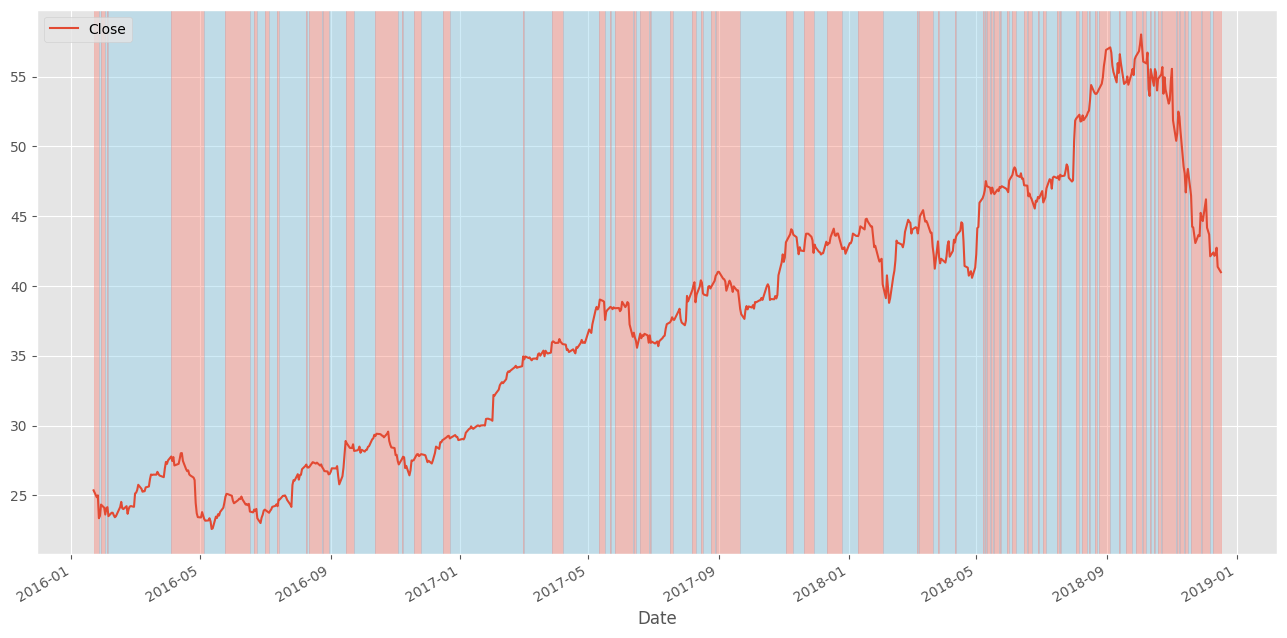

In [28]:
# train and test together
fig, ax = plt.subplots(1, 1, figsize=(16, 8))
stock_close_df.plot(ax=ax)

prediction_spans = get_prediction_spans(stock_predictions_train_series)
for span in prediction_spans:
    ax.axvspan(
        span["start"],
        span["end"],
        alpha=0.4,
        color="skyblue" if span["prediction"] == 1 else "salmon",
    )

prediction_spans = get_prediction_spans(stock_predictions_test_series)
for span in prediction_spans:
    ax.axvspan(
        span["start"],
        span["end"],
        alpha=0.4,
        color="skyblue" if span["prediction"] == 1 else "salmon",
    )


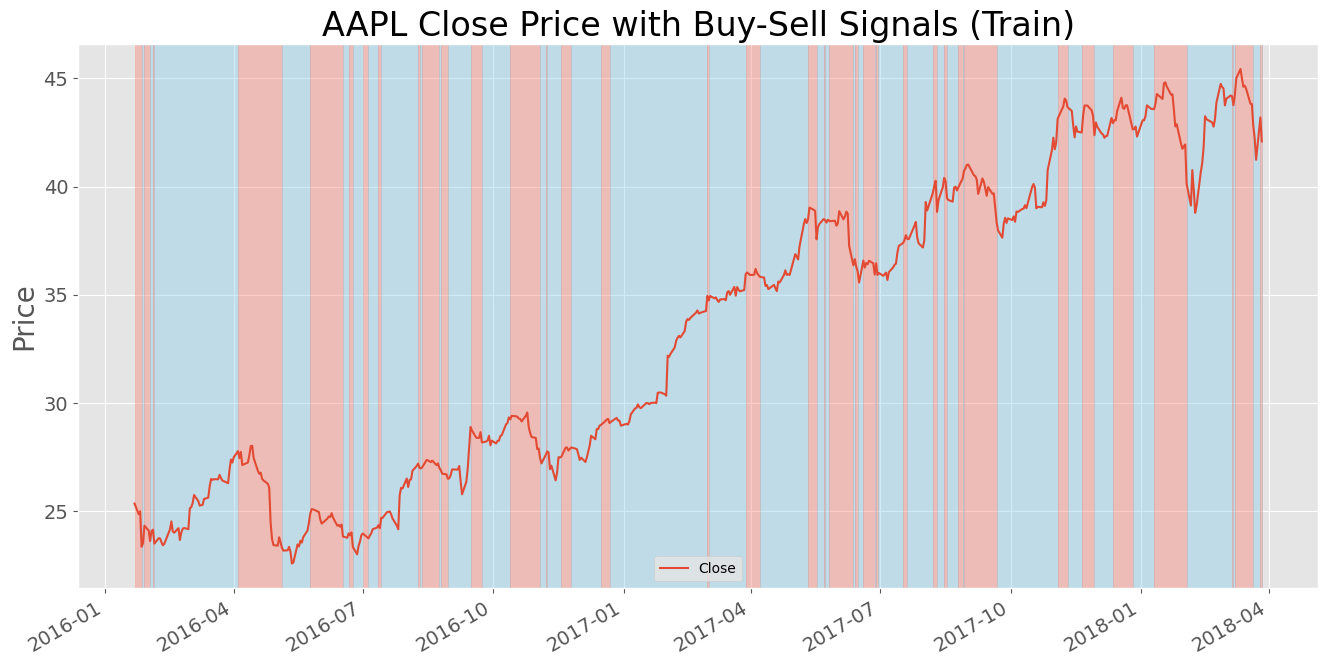

In [29]:
# train
fig, ax = plt.subplots(1, 1, figsize=(16, 8))
stock_close_df.loc["2016-01-22":"2018-03-27"].plot(ax=ax, fontsize=14)

prediction_spans = get_prediction_spans(stock_predictions_train_series)
for span in prediction_spans:
    ax.axvspan(
        span["start"],
        span["end"],
        alpha=0.4,
        color="skyblue" if span["prediction"] == 1 else "salmon",
    )

ax.set_title(f"{ticker} Close Price with Buy-Sell Signals (Train)", fontsize=24)
ax.set_ylabel("Price", fontsize=20)
ax.set_xlabel("")

fig.savefig("../figures/buy_sell_signals_train.png", dpi=200, bbox_inches="tight")

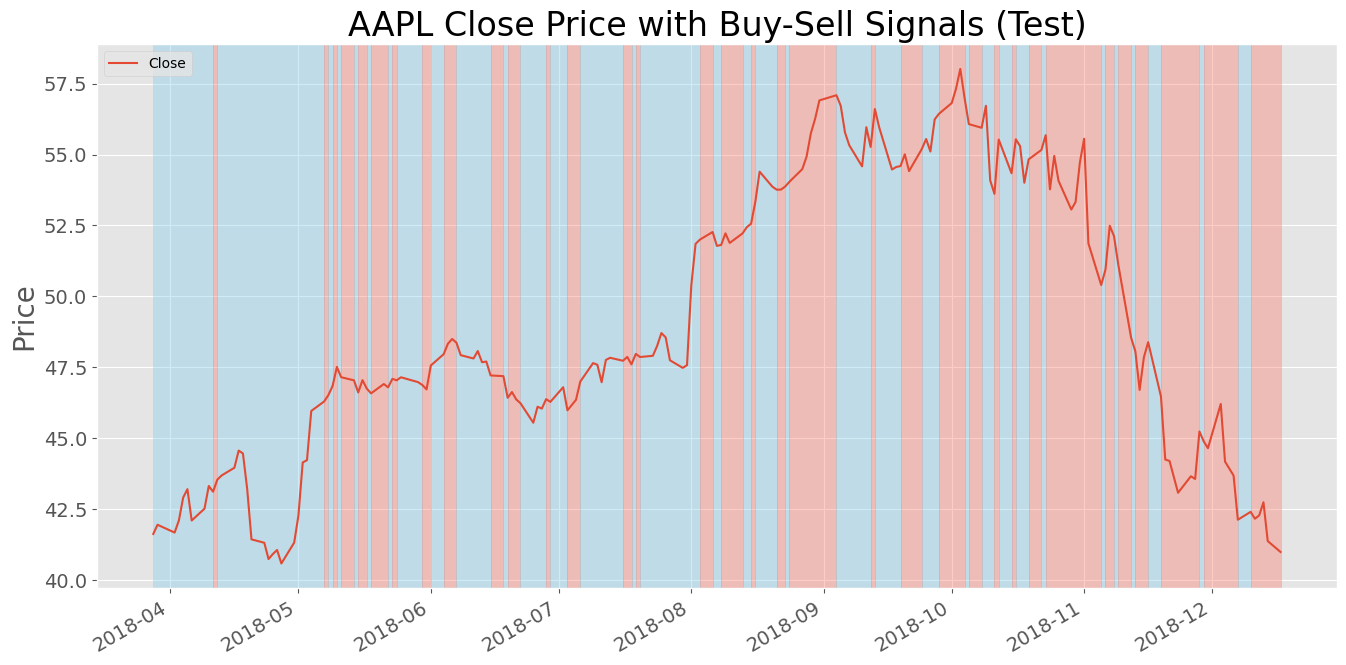

In [30]:
# test
fig, ax = plt.subplots(1, 1, figsize=(16, 8))
stock_close_df.loc["2018-03-28":"2018-12-17"].plot(ax=ax, fontsize=14)

prediction_spans = get_prediction_spans(stock_predictions_test_series)
for span in prediction_spans:
    ax.axvspan(
        span["start"],
        span["end"],
        alpha=0.4,
        color="skyblue" if span["prediction"] == 1 else "salmon",
    )

ax.set_title(f"{ticker} Close Price with Buy-Sell Signals (Test)", fontsize=24)
ax.set_ylabel("Price", fontsize=20)
ax.set_xlabel("")

fig.savefig("../figures/buy_sell_signals_test.png", dpi=200, bbox_inches="tight")